In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
train=pd.read_csv('/content/KwhConsumptionBlower78_1.csv')

In [15]:
train.timestamp=pd.to_datetime(train.TxnDate,format='%d %b %Y')
train.index=train.timestamp
train.drop("TxnDate",axis=1,inplace=True)

In [16]:
train.head()

,Unnamed: 0,TxnTime,Consumption
TxnDate,,,
2022-01-01,76229,16:55:52,1.010
2022-01-01,76258,21:45:29,0.908
2022-01-01,76287,12:24:52,0.926
2022-01-01,76316,04:07:36,0.928
2022-01-01,76345,06:52:25,0.916


Index(['Unnamed: 0', 'TxnTime', 'Consumption'], dtype='object')


<Axes: xlabel='TxnDate'>

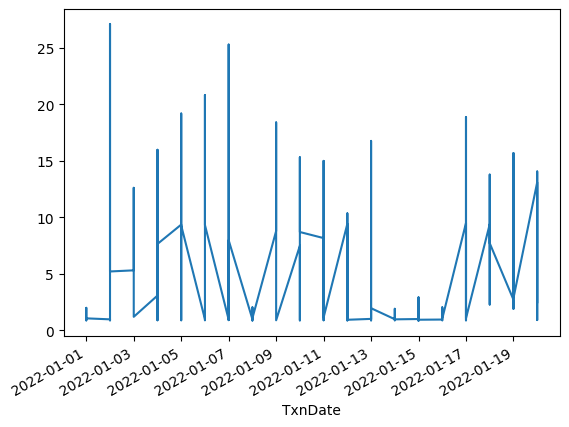

In [21]:
print(train.columns)
train.columns = train.columns.str.strip()
train['Consumption'].plot()


In [22]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [23]:
adf_test(train['Consumption'])

Results of Dickey-Fuller Test:
Test Statistic                   -3.847489
p-value                           0.002457
#Lags Used                       14.000000
Number of Observations Used    1213.000000
Critical Value (1%)              -3.435752
Critical Value (5%)              -2.863926
Critical Value (10%)             -2.568040
dtype: float64


<Axes: xlabel='TxnDate'>

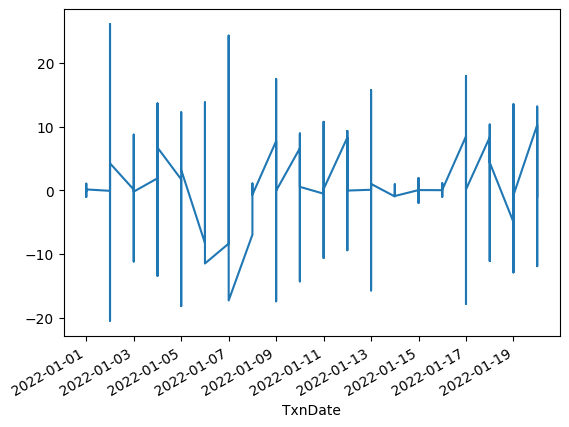

In [24]:
train['Consumption_diff']=train['Consumption']-train['Consumption'].shift(1)
train['Consumption_diff'].dropna().plot()

<Axes: xlabel='TxnDate'>

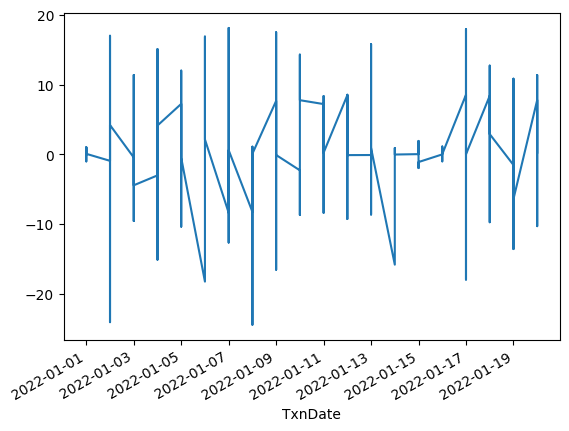

In [25]:
n=7
train['Consumption_diff']=train['Consumption']-train['Consumption'].shift(n)
train['Consumption_diff'].dropna().plot()

<Axes: xlabel='TxnDate'>

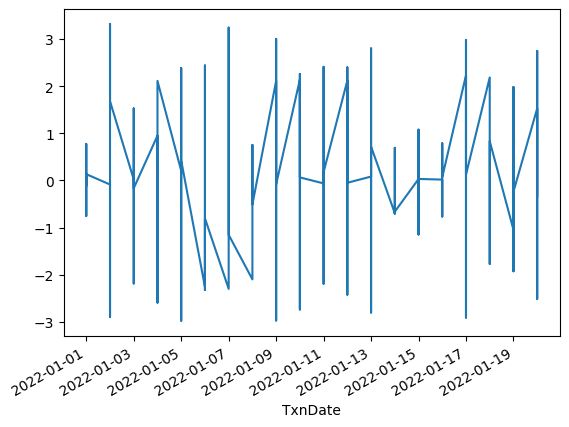

In [26]:
train['Consumption_log']=np.log(train['Consumption'])
train['Consumption_log_diff']=train['Consumption_log']-train['Consumption_log'].shift(1)
train['Consumption_log_diff'].dropna().plot()